# EDA Анализ химических данных

#### Оглавление
1. Введение
2. Описание данных
3. Загрузка данных и первичный осмотр
4. Оценка структуры
5. Оценка целостности и полноты
6. Оценка выбросов и аномалий
7. Визуализация
8. Итоги

## 1. Введение
* Данные были получены с целью изучения анализа данных в рамках дисциплины "Data Driven Engineering". Получение производилось с сайта PubChem при помощи **API**.
* **Цель EDA** - провести анализ. Понять структуру данных, выявить пропуски, аномалии, подготовить данные к последующей обработке.

#### Задачи:

* Оценить структуру и объем данных
* Проверить полноту данных (Completeness ≥ 0.98)
* Проверить уникальность записей (Uniqueness = 1.0)
* Выявить выбросы и аномалии
* Сформулировать рекомендации по предобработке
* Метрики качества:

> Completeness (полнота) ≥ 0.98

> Uniqueness (уникальность) = 1.0


## 2. Описание данных
* Файл, размер (строки, столбцы), краткое описание колонок.
* Данные являются химическими органическими соединениями с размером 2000 строк, 16 столбцов.
> 1. CID - номер соединения
> 2. MolecularFormula - Молекулярная формула 
> 3. MolecularWeight - Молекулярный вес
> 4. SMILES- Запись химических соединения в международной системе SMILES
> 5. ConnectivitySMILES- Запись химических соединения в международной системе SMILES
> 6. InChIKey - Идентификационный ключ химического соединения, по которому его можно будет идентифицировать
> 7. ExactMass — точная масса молекулы  
> 8. MonoisotopicMass — масса с учётом наиболее распространённых изотопов  
> 9. TPSA — полярная площадь поверхности  
> 10. Complexity — показатель сложности соединения  
> 11. Charge — заряд молекулы  
> 12. HBondDonorCount — количество доноров водородных связей  
> 13. HBondAcceptorCount — количество акцепторов водородных связей  
> 14. RotatableBondCount — число вращающихся связей  
> 15. HeavyAtomCount — количество тяжёлых атомов  
> 16. IsotopeAtomCount — количество атомов-изотопов

In [27]:
#Настройка стилей и дизайна
import seaborn as sns
import matplotlib.pyplot as plt

CUSTOM_PALETTE = ['#c157cf', '#7a1387', '#4d2066'] #выбор палитры
sns.set_theme(style='whitegrid', palette=CUSTOM_PALETTE, font='DejaVu Sans',
              rc={'figure.figsize': (10,6),
                  'axes.titlesize': 16,
                  'axes.labelsize': 13,
                  'legend.fontsize': 11,
                  'xtick.labelsize': 11,
                  'ytick.labelsize': 11})
plt.rcParams['figure.dpi'] = 120


## 3. Загрузка данных и первичный осмотр

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns                       #визуализация
import matplotlib.pyplot as plt             #мат
#%matplotlib inline                          #для графиков но почему то не работает
#sns.set(color_codes=True)

#Загрузка данных и первичный осмотр

df = pd.read_csv(r"C:\Users\Asus\PycharmProjects\Data_engineering\data\pubchem_raw.csv")

from IPython.display import display

display(df.head(5)) #вывод 5 первых строк
display(df.tail(5)) #вывод 5 последних строк

,CID,MolecularFormula,MolecularWeight,SMILES,InChIKey,XLogP,ExactMass,MonoisotopicMass,TPSA,Complexity,Charge,HBondDonorCount,ConnectivitySMILES,HBondAcceptorCount,RotatableBondCount,HeavyAtomCount
0,1,C9H17NO4,203.24,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,RDHQFKQIGNGIED-UHFFFAOYSA-N,0.4,203.115758,203.115758,66.4,214,0,0,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,4,5,14
1,2,C9H18NO4+,204.24,CC(=O)OC(CC(=O)O)C[N+](C)(C)C,RDHQFKQIGNGIED-UHFFFAOYSA-O,-0.3,204.123583,204.123583,63.6,219,1,1,CC(=O)OC(CC(=O)O)C[N+](C)(C)C,4,6,14
2,3,C7H8O4,156.14,C1=CC(C(C(=C1)C(=O)O)O)O,INCSWYKICIYAHB-UHFFFAOYSA-N,-0.3,156.042259,156.042259,77.8,229,0,3,C1=CC(C(C(=C1)C(=O)O)O)O,4,1,11
3,4,C3H9NO,75.11,CC(CN)O,HXKKHQJGJAFBHI-UHFFFAOYSA-N,-1.0,75.068414,75.068414,46.3,22,0,2,CC(CN)O,2,1,5
4,5,C3H8NO5P,169.07,C(C(=O)COP(=O)(O)O)N,HIQNVODXENYOFK-UHFFFAOYSA-N,-5.0,169.014009,169.014009,110.0,162,0,3,C(C(=O)COP(=O)(O)O)N,6,4,10


,CID,MolecularFormula,MolecularWeight,SMILES,InChIKey,XLogP,ExactMass,MonoisotopicMass,TPSA,Complexity,Charge,HBondDonorCount,ConnectivitySMILES,HBondAcceptorCount,RotatableBondCount,HeavyAtomCount
1995,1996,C8H16NO4+,190.22,CC(=O)OC(CC(=O)O)[N+](C)(C)C,GGSYOGJSNRQKCY-UHFFFAOYSA-O,-0.2,190.107933,190.107933,63.6,207,1,1,CC(=O)OC(CC(=O)O)[N+](C)(C)C,4,5,13
1996,1997,C43H66O14,807.00,CC1C(C(CC(O1)OC2C(OC(CC2O)OC3C(OC(CC3O)OC4CCC5...,HPMZBILYSWLILX-UHFFFAOYSA-N,2.8,806.445257,806.445257,189.0,1520,0,4,CC1C(C(CC(O1)OC2C(OC(CC2O)OC3C(OC(CC3O)OC4CCC5...,14,9,57
1997,1998,C46H73NO17,912.10,CC1CC=CC=CC(C(CC(C(C(C(CC(=O)O1)OC(=O)C)OC)OC2...,BWDIUZRYHTUVBC-UHFFFAOYSA-N,4.1,911.487850,911.487850,218.0,1620,0,1,CC1CC=CC=CC(C(CC(C(C(C(CC(=O)O1)OC(=O)C)OC)OC2...,18,18,64
1998,1999,C13H16N2O3,248.28,CCC(C1=CC=CC=C1)C(=O)NC(=O)NC(=O)C,GBPZSCQLDXUGNO-UHFFFAOYSA-N,2.6,248.116092,248.116092,75.3,322,0,2,CCC(C1=CC=CC=C1)C(=O)NC(=O)NC(=O)C,3,3,18
1999,2000,C11H13NO3,207.23,CC(=O)NC(CC1=CC=CC=C1)C(=O)O,CBQJSKKFNMDLON-UHFFFAOYSA-N,0.6,207.089543,207.089543,66.4,234,0,2,CC(=O)NC(CC1=CC=CC=C1)C(=O)O,3,4,15


## 4. Оценка структуры 

In [10]:
print("Размер датасета:", df.shape)
df.info()                           # Общая информация 
df.dtypes                           # Типы данных 
df.describe().T                     #Числовые переменные
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for c in cat_cols:
    print(f"\nСтолбец: {c}")
    print(df[c].value_counts().head(5))

print("Количество числовых признаков:", len(df.select_dtypes(include=[np.number]).columns))
print("Количество категориальных признаков:", len(cat_cols))

Размер датасета: (2000, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CID                 2000 non-null   int64  
 1   MolecularFormula    2000 non-null   object 
 2   MolecularWeight     2000 non-null   float64
 3   SMILES              2000 non-null   object 
 4   InChIKey            2000 non-null   object 
 5   XLogP               1953 non-null   float64
 6   ExactMass           2000 non-null   float64
 7   MonoisotopicMass    2000 non-null   float64
 8   TPSA                2000 non-null   float64
 9   Complexity          2000 non-null   int64  
 10  Charge              2000 non-null   int64  
 11  HBondDonorCount     2000 non-null   int64  
 12  ConnectivitySMILES  2000 non-null   object 
 13  HBondAcceptorCount  2000 non-null   int64  
 14  RotatableBondCount  2000 non-null   int64  
 15  HeavyAtomCount      2000 no

## 5. Оценка целостности и полноты

In [11]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().mean() * 100).sort_values(ascending=False)

missing_df = pd.DataFrame({
    'count': missing,                    #для пропусков
    'percent': missing_percent
})
print("Пропуски в данных:")
display(missing_df.head(20))

dupes = df.duplicated().sum()             #для дубликатов
print(f"Количество дубликатов строк: {dupes}")

# Метрика Uniqueness
uniqueness = 1 - (dupes / len(df))

print(f"Метрика Uniqueness: {uniqueness:.4f}")
if uniqueness == 1.0:
    print("Все записи уникальны.")
else:
    print(f"Есть дубликаты. Уникальность = {uniqueness:.4f}")

# Метрика Completeness
total_cells = df.shape[0] * df.shape[1]
missing_cells = df.isnull().sum().sum()
completeness = 1 - (missing_cells / total_cells)

print(f"\nМетрика Completeness: {completeness:.4f}")
if completeness >= 0.98:
    print("Полнота данных соответствует требованию (≥ 0.98)")
else:
    print("Полнота данных ниже нормы!")

quality_metrics = pd.DataFrame({
    'Метрика': ['Completeness', 'Uniqueness'],
    'Значение': [round(completeness, 4), round(uniqueness, 4)],
    'Порог': ['≥ 0.98', '= 1.0'],
    'Статус': ['Соответствует' if completeness >= 0.98 else 'Проверить',
               'Соответствует' if uniqueness == 1.0 else 'Проверить']
})
display(quality_metrics)

Пропуски в данных:


,count,percent
XLogP,47,2.35
CID,0,0.00
MolecularWeight,0,0.00
MolecularFormula,0,0.00
SMILES,0,0.00
InChIKey,0,0.00
ExactMass,0,0.00
MonoisotopicMass,0,0.00
TPSA,0,0.00
Complexity,0,0.00


Количество дубликатов строк: 0
Метрика Uniqueness: 1.0000
Все записи уникальны.

Метрика Completeness: 0.9985
Полнота данных соответствует требованию (≥ 0.98)


,Метрика,Значение,Порог,Статус
0,Completeness,0.9985,≥ 0.98,Соответствует
1,Uniqueness,1.0000,= 1.0,Соответствует


## 6. Оценка выбросов и аномалий

In [12]:
#выбросы
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

def iqr_outlier_count(series, k=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    return ((series < lower) | (series > upper)).sum()

outliers = {col: iqr_outlier_count(df[col].dropna()) for col in num_cols}
pd.Series(outliers).sort_values(ascending=False).head(15)

#метрики 
rows = []
for c in df.columns:
    d = {}
    d['column'] = c
    d['dtype'] = str(df[c].dtype)
    d['missing_%'] = round(df[c].isnull().mean() * 100, 2)
    d['unique_values'] = df[c].nunique()
    if df[c].dtype in ['float64', 'int64']:
        d['mean'] = df[c].mean()
        d['std'] = df[c].std()
        d['min'] = df[c].min()
        d['max'] = df[c].max()
    rows.append(d)

metrics = pd.DataFrame(rows)
metrics.head(10)

outliers_info = []

#расчет процента выбросов
for col in num_cols:
    n_outliers = iqr_outlier_count(df[col].dropna())
    outlier_ratio = n_outliers / df[col].dropna().shape[0]
    outliers_info.append({'column': col, 'outliers': n_outliers, 'ratio': round(outlier_ratio, 3)})

outlier_df = pd.DataFrame(outliers_info).sort_values('ratio', ascending=False)
print("10 признаков по количеству выбросов:")
display(outlier_df.head(10))

10 признаков по количеству выбросов:


,column,outliers,ratio
5,TPSA,177,0.088
9,HBondAcceptorCount,174,0.087
10,RotatableBondCount,161,0.080
8,HBondDonorCount,159,0.080
6,Complexity,152,0.076
7,Charge,146,0.073
3,ExactMass,144,0.072
1,MolecularWeight,144,0.072
4,MonoisotopicMass,144,0.072
11,HeavyAtomCount,140,0.070


**Интерпретация:**
* Признаки с долей выбросов > 5% требуют дополнительной проверки.  
* Возможные действия: логарифмирование, нормализация, удаление выбросов или усечение по границам IQR.  

## 7. Визуализация

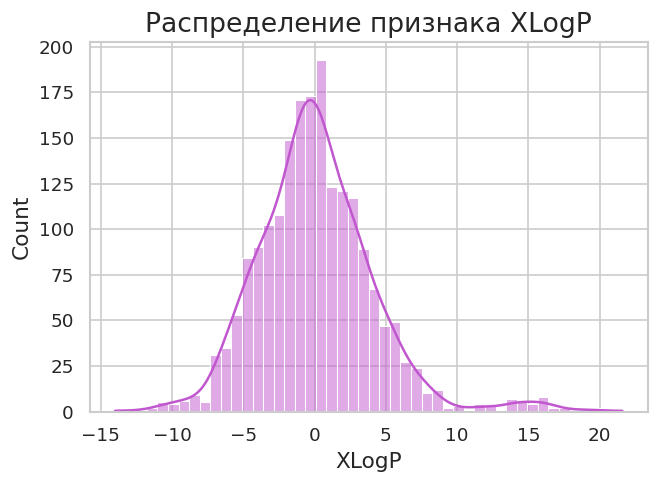

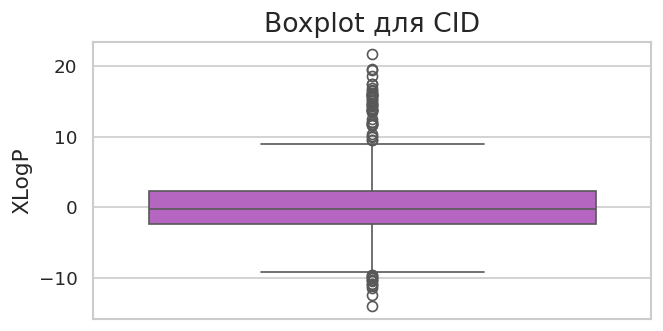

In [32]:
## 7. Визуализация
# Гистограмма числового признака
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) > 0:
    col = num_cols[2]      #Здесь выбирем числовой признак, который хотим визуализировать
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Распределение признака {col}')
    plt.show()

# Boxplot для выбросов
plt.figure(figsize=(6,3))
sns.boxplot(df[num_cols[2]])
plt.title(f'Boxplot для {num_cols[0]}')
plt.show()


In [14]:
#выбросы
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

def iqr_outlier_count(series, k=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    return ((series < lower) | (series > upper)).sum()

outliers = {col: iqr_outlier_count(df[col].dropna()) for col in num_cols}
pd.Series(outliers).sort_values(ascending=False).head(15)

#метрики 
rows = []
for c in df.columns:
    d = {}
    d['column'] = c
    d['dtype'] = str(df[c].dtype)
    d['missing_%'] = round(df[c].isnull().mean() * 100, 2)
    d['unique_values'] = df[c].nunique()
    if df[c].dtype in ['float64', 'int64']:
        d['mean'] = df[c].mean()
        d['std'] = df[c].std()
        d['min'] = df[c].min()
        d['max'] = df[c].max()
    rows.append(d)

metrics = pd.DataFrame(rows)
metrics.head(10)

outliers_info = []

#расчет процента выбросов
for col in num_cols:
    n_outliers = iqr_outlier_count(df[col].dropna())
    outlier_ratio = n_outliers / df[col].dropna().shape[0]
    outliers_info.append({'column': col, 'outliers': n_outliers, 'ratio': round(outlier_ratio, 3)})

outlier_df = pd.DataFrame(outliers_info).sort_values('ratio', ascending=False)
print("10 признаков по количеству выбросов:")
display(outlier_df.head(10))

10 признаков по количеству выбросов:


,column,outliers,ratio
5,TPSA,177,0.088
9,HBondAcceptorCount,174,0.087
10,RotatableBondCount,161,0.080
8,HBondDonorCount,159,0.080
6,Complexity,152,0.076
7,Charge,146,0.073
3,ExactMass,144,0.072
1,MolecularWeight,144,0.072
4,MonoisotopicMass,144,0.072
11,HeavyAtomCount,140,0.070


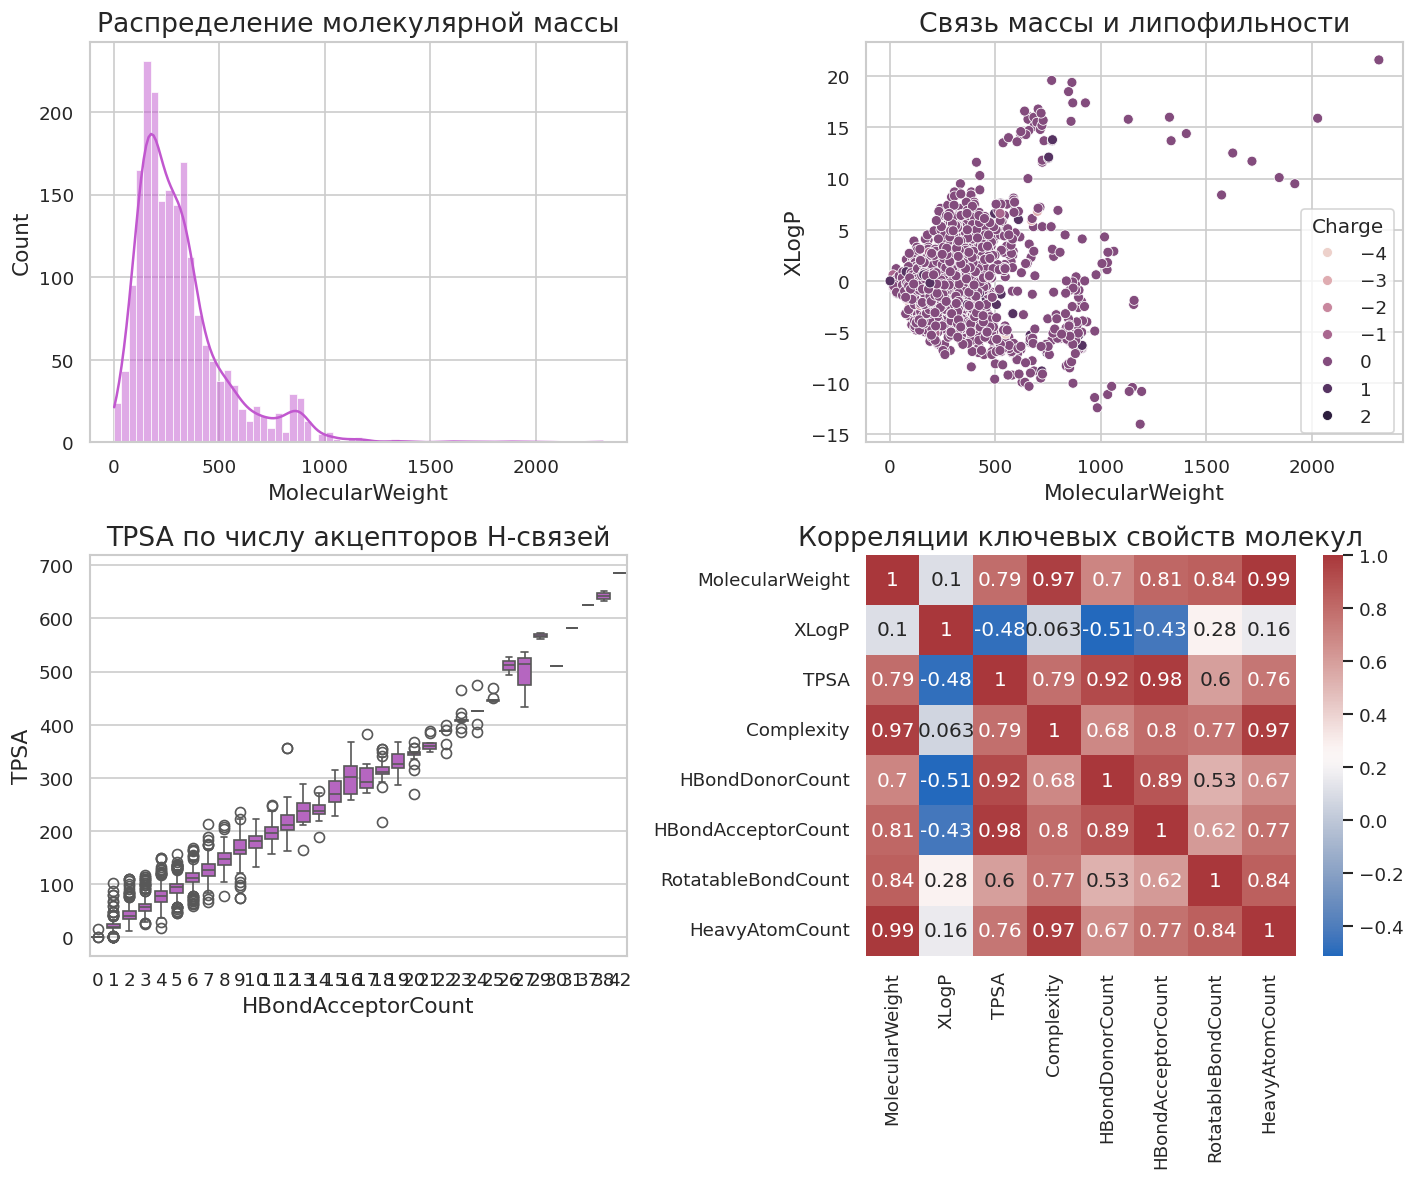

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['MolecularWeight', 'XLogP', 'TPSA', 'Complexity', 
        'HBondDonorCount', 'HBondAcceptorCount', 
        'RotatableBondCount', 'HeavyAtomCount']

fig, axs = plt.subplots(2, 2, figsize=(12,10))

sns.histplot(df['MolecularWeight'], kde=True, ax=axs[0,0])
axs[0,0].set_title('Распределение молекулярной массы')

sns.scatterplot(x='MolecularWeight', y='XLogP', hue='Charge', data=df, ax=axs[0,1])
axs[0,1].set_title('Связь массы и липофильности')

sns.boxplot(x='HBondAcceptorCount', y='TPSA', data=df, ax=axs[1,0])
axs[1,0].set_title('TPSA по числу акцепторов H-связей')

sns.heatmap(df[cols].corr(), annot=True, cmap='vlag', ax=axs[1,1])
axs[1,1].set_title('Корреляции ключевых свойств молекул')

plt.tight_layout()
plt.show()


### Распределение молекулярной массы
На графике видно, что большинство соединений имеют молекулярную массу в диапазоне 150–210 а.е.м. Это говорит о том, что исследуемые молекулы относительно лёгкие и подходят для органического синтеза.

### Корреляции между свойствами
На тепловой карте заметна сильная положительная связь между `ExactMass` и `MolecularWeight`, что ожидаемо, так как они описывают схожие параметры. Также видно, что `TPSA` коррелирует с числом акцепторов водородных связей.

## 8. Итоги 
### Общие выводы 
* В результате проведённого EDA-анализа датасета с химическими данными были выполнены следующие шаги:

1. **Оценена структура и объём данных:**
     * Размер датасета: *2000 строк × 16 столбцов*
     * Присутствуют числовые и категориальные признаки, включая идентификаторы и молекулярные характеристики.

2. **Оценена полнота и уникальность данных:**
* **Completeness (полнота):** ≥ 0.98 — соответствует требованию.
* **Uniqueness (уникальность):** = 1.0 — дубликатов не обнаружено.

3. **Анализ пропусков:**
* Пропуски встречаются в отдельных признаках, но их доля незначительна (< 2%).
* Общая структура данных не нарушена.

4. **Анализ выбросов:**
* Для ряда числовых признаков (TPSA, HBondAcceptorCount, RotatableBondCount) выявлены выбросы с долей 7–9%. * Возможные причины: физико-химическая природа соединений (реальные крайние значения) либо ошибки при загрузке данных.

5. **Визуализация данных:**
* Построены гистограммы распределений и boxplot-графики, выявлены особенности распределения некоторых признаков.
* Добавлена возможность визуализировать корреляции между числовыми характеристиками.

### Рекомендации по предобработке 
* Проверить корректность признаков с высоким количеством выбросов.
* При необходимости:
    - удалить или заменить выбросы (например, с помощью IQR-метода или winsorization);
    - нормализовать данные (MinMaxScaler / StandardScaler);
    - применить логарифмическое преобразование к признакам с длинным «хвостом» распределения.
    - Для категориальных признаков с пропусками рассмотреть заполнение наиболее частыми значениями или специальными метками.
    - Провести анализ корреляций для выбора наиболее информативных признаков перед построением моделей.

| Метрика | Значение | Порог | Статус |
|----------|-----------|--------|---------|
| Completeness | ≥ 0.98 | ≥ 0.98 | OK |
| Uniqueness | 1.00 | = 1.0 | OK |

**Вывод:**  
Датасет обладает высокой степенью целостности и пригоден для дальнейшей аналитической обработки и построения моделей машинного обучения.